In [1]:
pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 3.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

width = 6
height = 3
import matplotlib
matplotlib.rcParams['figure.figsize'] = [width, height]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn

from hmmlearn.hmm import GaussianHMM

In [3]:
print(pd.__version__)
print(np.__version__)
print(hmmlearn.__version__)

2.2.3
1.26.4
0.3.3


## Look at the data

In [4]:
nile = pd.read_csv("/kaggle/input/nile-data/Nile.csv", index_col = 0)

In [5]:
nile.head()

,year,val
1,1871,1120
2,1872,1160
3,1873,963
4,1874,1210
5,1875,1160


Одна из возможных причин, по которым обучение не привело к хорошему согласованию с базовыми скрытыми состояниями, заключается в отказе от использования правильной матрицы переходов, необходимой для обучения. В результате переходы между состояниями не были Марковскими, и это оказало пагубное влияние на обучение. Кроме того, мы пытались приблизить относительно короткий временной ряд с небольшим количеством переходов между состояниями, в то время как модели НММ лучше работают на более длинных временных рядах с большим количеством переходов. Я бы рекомендовал придумать более реалистичные искусственные данные для тестирования предлагаемой модели НММ. Помните, что в большинстве практических задач приходится работать с ненаблюдаемыми состояниями, поэтому перед тем как взяться за более амбициозные проекты, постарайтесь разобраться в факторах, вносящих ограничения в точность модели, в предельно простых случаях (с искусственными данными).
Модели НММ подходят для анализа многих видов данных. Они использовались для моделирования поведения финансовых рынков в фазе роста и рецессии, определения стадии скручивания белка в клетках и описания перемещения людей (до появления глубокого изучения). На сегодняшний день они остаются востребованными — чаще в задачах исследования динамического поведения систем, чем прогнозирования. Кроме того, модели НММ предоставляют больше сведений о процессах, чем точечные оценки или прогнозы. В такую модель легко включить априорные знания или предположения, например, указав количество состояний, используемых для ее обучения. Тем самым обеспечиваются преимущества статистических методов, но сохраняется возможность параметризации априорных знаний о системе.
Математические принципы и уравнения, используемые для расчета моделей НММ, хорошо изучены и доступны для понимания. На ваше рассмотрение предлагается большое количество программных инструментов и численных алгоритмов оптимизации, используемых при обучении моделей НММ по данным. Вы также познакомитесь с методами динамического программирования, с которыми нужно быть на “ты” каждому специалисту по анализу данных или программисту.
Как и фильтры Калмана, модели НММ могут использоваться для решения задач самых разных типов. На самом деле количество задач логического вывода, связанных с НММ-системами, увеличивается с повышением сложности дискретных состояний, каждое из которых имеет собственную вероятность эмиссии. Перечислим некоторые из задач логического вывода, с которыми вы можете столкнуться при использовании моделей НММ.


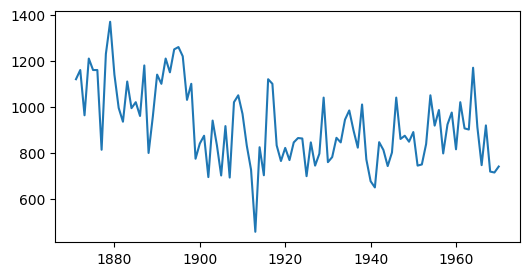

In [6]:
plt.plot(nile.year, nile.val)

## Let's take a look at the hmmlearn API

In [7]:
vals = np.expand_dims(nile.val.values, 1)
n_states = 2
model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
hidden_states = model.predict(vals)

In [8]:
np.bincount(hidden_states)

array([72, 28])

• Определение наиболее вероятного описания состояний, производящих ряд наблюдений. Включает в себя оценку вероятностей эмиссии этих состояний, а также матрицы переходов, которая показывает вероятность перехода процесса из одного состояния в другое. Мы проделали это выше, хотя и не задавали вероятности перехода в явном виде.
• Определение наиболее вероятной последовательности состояний с учетом ряда наблюдений и описания состояний, а также вероятностей их эмиссии и переходов. Мы также выполнили эту задачу в предыдущем упражнении. Иногда ее называют “наиболее вероятное объяснение”, и для ее решения обычно применяется алгоритм Витерби.
• Фильтрация и сглаживание. В этой ситуации фильтрация будет соответствовать оценке скрытого состояния последнего временного шага с учетом последнего наблюдения. Сглаживание будет соответствовать определению наиболее вероятного распределения скрытого состояния на конкретном временном шаге с учетом наблюдений до, во время и после этого временного шага.


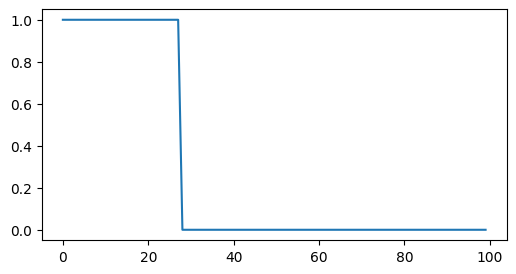

In [9]:
plt.plot(hidden_states)

## Exercise: how can we package this more conveniently?

### Байесовский структурный временной ряд
Байесовский структурный временной ряд (Bayesian structural time series — BSTS) связан с линейной гауссовой моделью, которую мы ранее использовали в фильтрах Калмана. Основное различие состоит в том, что байесовские структурные временные ряды позволяют использовать уже существующие компоненты для построения более сложных моделей, которые отражают известные факты или интересные гипотезы о системе. С их помощью можно разработать структуру модели, провести обучение по имеющимся данным для оценки параметров модели и посмотреть, насколько хорошо модель описывает и предсказывает поведение системы.
Модель BSTS базируется на более сложных математических принципах, чем те, которые использовались в линейной гауссовой модели, которая рассматривалась при изучении фильтра Калмана. Ниже приведен только краткий их обзор, а также пример реализации в программном коде.
Обучение модели BSTS выполняется в четыре этапа, следующих в таком порядке.
1. Определение структурной модели, в частности задание априорных вероятностей.
2. Применение фильтра Калмана для обновления оценок состояния на основе наблюдаемых данных.
3. Применение метода “пик-плато” для выбора переменных в структурной модели (познакомиться с методом “пик-плато” можно в Википедии. Его математика довольно сложная, и мы не будем останавливаться на ее детальном рассмотрении. Метод “пик-плато” наиболее востребован в системах с большим количеством входных данных, которые нужно описать упрощенной моделью с небольшим количеством переменных).
4. Усреднение по байесовской модели для объединения результатов с целью составления прогноза.
В следующем примере мы сосредоточимся только на шагах 1 и 2, в которых определяется гибкость модели, основанной на существующих модульных компонентах, а затем обучим ее на имеющихся данных с помощью байесовского метода, обновляющего оценку параметров с течением времени.

Код реализации байесовских структурных временных рядов
В дальнейшей работе будем использовать популярный и невероятно производительный пакет bsts, разработанный Google, и открытый набор данных, полученный с ресурса OpenEI.org.
Отобразим исходные данные на графике, чтобы получить представление о том, что именно нам необходимо смоделировать.


In [10]:

def fitHMM(vals, n_states):
    vals = np.reshape(vals,[len(vals),1])
    
    # fit Gaussian HMM to Q
    model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
     
    # classify each observation as state 0 or 1
    hidden_states = model.predict(vals)
 
    # fit HMM parameters
    mus = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    transmat = np.array(model.transmat_)
    print(mus)
    print(sigmas)
    
#     # re-order parameters in ascending order of mean of underlying distribution
#     idx      = np.argsort(mus)
#     mus      = mus[idx]
#     sigmas   = sigmas[idx]
#     transmat = transmat[idx, :][:, idx]
    
#     state_dict = {}
#     states = [i for i in range(n_states)]
#     for i in idx:
#         state_dict[i] = states[idx[i]]
    
#     relabeled_states = [state_dict[h] for h in hidden_states]
    relabeled_states = hidden_states
    return (relabeled_states, mus, sigmas, transmat, model)

In [11]:
hidden_states, mus, sigmas, transmat, model = fitHMM(nile.val.values, 2)

[1097.15259034  850.75613476]
[133.74763685 124.44605701]


## Exercise: how might we be able to plot this more sensibly?

In [12]:
def plot_states(ts_vals, states, time_vals):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Year)')
    ax1.set_ylabel('Nile river flow',         color=color)
    ax1.plot(time_vals, ts_vals,      color=color)
    ax1.tick_params(axis='y',            labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(time_vals,states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

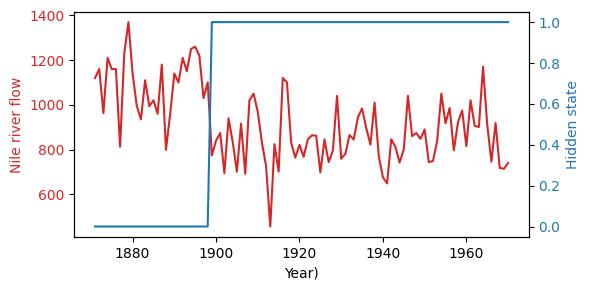

In [13]:
plot_states(nile.val, hidden_states, nile.year)

## Exercise: can we improve on the analysis above?

Просмотр данных позволяет определиться с принципами моделирования. На графике достаточно четко просматривается дневной шаблон, и существует вероятность получения подобного шаблона для недельного изменения данных. Такие шаблоны отражают сезонное поведение данных, которое нужно отразить в модели. Кроме того, в ней нужно учесть присутствующий в данных тренд, представляющий нестационарное поведение, наблюдаемое в верхней области построения.

### Cut off the 'special' region

In [14]:
np.where(hidden_states == 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),)

Локальный линейный тренд модели отображает тот факт, что среднее значение и наклон линии тренда описываются случайным блужданием (дополнительная информация приведена на сайте https://perma.cc/2N77-ALJ4).
Сезонная составляющая модели представлена двумя аргументами, один из которых указывает количество сезонов, а другой — продолжительность сезона. Первая добавляемая в модель сезонная составляющая определяет дневной цикл. В нее нужно включать сезоны почасового изменения данных — каждый длительностью один час. Вторая сезонная составляющая представляет недельный цикл. Нам нужно добавить в нее сезоны для каждого дня недели, каждый из которых длится 24 часа.
Вы можете задаться вопросом, действительно ли нужно начинать наблюдения в 12:01 в понедельник (или определить неделю другим способом). В данном случае согласованность данных важнее, чем назначение сезонной подписи первому дню недели. На самом деле в наблюдаемой повторяющейся структуре анализ сезонности можно выполнять при абсолютно любом способе разбивки данных на 24 часовые интервалы.
Ниже приведена наиболее сложная в вычислительном отношении часть кода. Преимущество пакета bsts заключается в возможности проведения вычислений по методу Монте-Карло с использованием марковских цепей 


In [15]:
hidden_states, mus, sigmas, transmat, model = fitHMM(nile.val.values, 3)


[ 852.13279416 1097.17550585  850.29450085]
[151.23659935 133.804946   106.98369315]


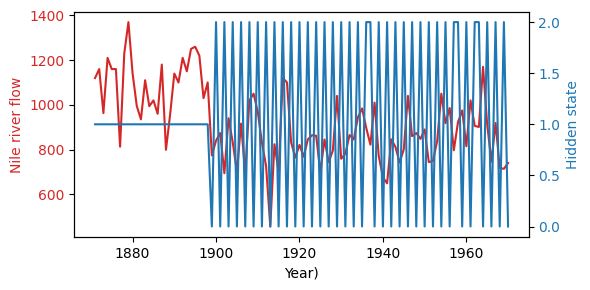

In [16]:
plot_states(nile.val, hidden_states, nile.year)

Недельная сезонная составляющая демонстрирует хорошую устойчивость, в то время как дневная сезонность, показанная на графике, сильно зависит от времени суток (вероятнее всего, привязана к световому дню).
Также проявляется локальный линейный тренд, показывающий общее снижение потребления электроэнергии.
Наконец, построим прогноз апостериорного распределения, отображаемого в графическом виде. Обратите внимание, что модель настолько гибка, что позволяет указать количество временных горизонтов, подлежащих предсказанию.
Помните, что временной горизонт указывается на почасовой основе — прогнозирование вперед на 24 временных горизонта может показаться амбициозным шагом, но на самом деле будет выполняться всего на один день. В нашем примере прогнозирование проводится для 72 периодов времени, что определяется контекстом задачи.


In [17]:
mus

array([ 852.13279416, 1097.17550585,  850.29450085])

In [18]:
np.set_printoptions(precision = 3, suppress = True)

In [19]:
transmat

array([[0.   , 0.   , 1.   ],
       [0.035, 0.964, 0.001],
       [0.542, 0.   , 0.458]])

In [20]:
mus

array([ 852.133, 1097.176,  850.295])

## Exercise: generate new synthetic data from the model and then fit it with a fresh HMM model

#### Easy to sample from an existing HMM model

In [21]:
res = np.squeeze(model.sample(1000)[0])

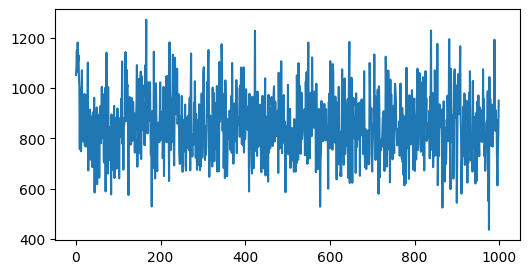

In [22]:
plt.plot(res)

В пакете bsts и байесовском моделировании структурных временных рядов есть немало возможностей, которые подлежат отдельной параметризации.
• Возможность указывать нестандартные априорные распределения.
• Выбор регрессоров с помощью метода "пик-плато".
• Усреднение байесовской модели. Всю необходимую информацию о реализации этих возможностей средствами пакета bsts вы найдете в его документации.
Вы получили только поверхностное представление о задачах, возлагаемых на модели BSTS. Ниже перечислено несколько важных особенностей, характеризующих сильные стороны технологии BSTS. • Модели BSTS позволяют выполнять моделировании с учетом любых априорных распределений. Стандартная линейная гауссова модель, которую мы рассмотрели при обсуждении фильтра Калмана, является лишь одним из вариантов классического априорного распределения, в то время как модель BSTS работает с множеством других вариантов (например, асимметричными априорными вероятностями).
• В BSTS разрешается самостоятельно выбирать переменные.
• Модели BSTS можно комбинировать с методами усреднения байесовских моделей, что позволяет устранить неопределенность, связанную с выбором модели.
Хотя в текущем примере данные возможности не учитывались, все они доступны для реализации с помощью пакета bsts. Вы можете найти много соответствующих примеров в Интернете.


#### Then refit

In [23]:
hidden_states, mus, sigmas, transmat, model = fitHMM(res, 3)

[ 852.771  756.863 1090.194]
[121.351   0.1    52.579]


In [24]:
def plot_states_no_time(ts_vals, states):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time)')
    ax1.set_ylabel('Value',        color=color)
    ax1.plot(ts_vals,              color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(states,        color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

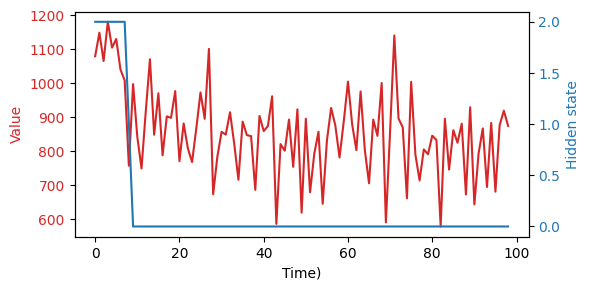

In [25]:
plot_states_no_time(res[1:100], hidden_states[1:100])

In [26]:
transmat

array([[1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.111, 0.889]])